## Watershed Processing in Python Part 1
- We use Scientific Python stack and Python spatial packages extensively in ORD Western Ecology Division Freshwater Ecology Branch
- We use this stack in support of:
    - Creation of [StreamCat Dataset](https://github.com/USEPA/StreamCat)
    - Creation of [LakeCat Dataset](https://github.com/USEPA/LakeCat)
    - National modeling of [watershed integrity](https://www.sciencedirect.com/science/article/pii/S1470160X17307070) and [aquatic condition](https://esajournals.onlinelibrary.wiley.com/doi/10.1002/eap.1617)
    - Generation of of landscape metrics for sample site watersheds for (EPA National Aquatic Resource Survey)[https://www.epa.gov/national-aquatic-resource-surveys] rivers and streams and lake surveys
- We'll look at how we apply tools in the Scientific Python stack for this last task specifically
    

## Why use scientific Python stack and packages like GeoPandas, Rasterio?
- Reproducible, open workflow
    - Anyone can access and install tools, anyone can run and reproduce results
    - Transparency of work
- Everything can be done in memory with GeoPandas and Rasterio - no intermediate files!!!
- You can have windowed, targeted read-ins of files with Rasterio - only load what you need into memory - fast processing!


## GeoPandas
- Pandas + spatial operations on geometric types
- Pandas:
    - Probably the most useful data wrangling tool in the Python toolbox
    - Allows you to work with data frame structures in Python (as in the wonderful world of R)
    - Easy, expressive merging, joining, group-by operations, reshaping of heterogeneous typed columnar data
    - Geometry stored as Shapely geometry objects and spatial features read in using [fiona](http://toblerity.org/fiona/manual.html) (which in turn relies on [GDAL / OGR](http://www.gdal.org/))

### Start Exploring
- We'll grab EPA NRSA 08-09 Watersheds from EPA National Aquatic Resource Surveys webpage
- This is the final watershed data Rick will show details of constructing in his talk

In [19]:
import requests, zipfile, io
zip_file_url = 'https://www.epa.gov/sites/production/files/2017-11/nrsa0809_watersheds.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

- GeoDataFrames are main object we work with in GeoPandas
- Look and act for the most part just like a Pandas DataFrame
- We can explore our GeoDataFrame the same as we would in Pandas

In [1]:
import geopandas as gpd
import pandas as pd
wshds = gpd.read_file('NRSA0809_Watersheds.shp')
type(wshds)


geopandas.geodataframe.GeoDataFrame

In [2]:
wshds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 18 columns):
SITE_ID       2172 non-null object
SITE_ID2      2172 non-null object
DATA_1        2172 non-null object
DATA_2        2172 non-null object
NOTES         2172 non-null object
Shape_Leng    2172 non-null float64
Shape_Area    2172 non-null float64
cbnfMN        2172 non-null float64
cbnfMIN       2172 non-null float64
cbnfMAX       2172 non-null float64
cbnfSTD       2172 non-null float64
cbnfCNT       2172 non-null int64
cbnfSUM       2172 non-null float64
cbnfMED       2172 non-null float64
cbnfQLOW      2172 non-null float64
cbnfQUPP      2172 non-null float64
Area_SqKM     2172 non-null float64
geometry      2172 non-null object
dtypes: float64(11), int64(1), object(6)
memory usage: 305.5+ KB


In [3]:
wshds.describe()

,Shape_Leng,Shape_Area,cbnfMN,cbnfMIN,cbnfMAX,cbnfSTD,cbnfCNT,cbnfSUM,cbnfMED,cbnfQLOW,cbnfQUPP,Area_SqKM
count,2.172000e+03,2.172000e+03,2172.0,2172.0,2172.0,2172.0,2172.0,2172.0,2172.0,2172.0,2172.0,2.172000e+03
mean,1.148199e+06,9.492945e+10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.492945e+04
std,3.510137e+06,4.542567e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.542567e+05
min,1.620000e+03,9.900000e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.900000e-02
25%,3.271493e+04,3.196265e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.196265e+01
50%,1.714601e+05,6.997758e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.997758e+02
75%,5.834501e+05,5.555961e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.555961e+03
max,2.145548e+07,3.195993e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.195993e+06


In [11]:
print(wshds.crs)

{'init': 'epsg:5070'}


Side note on coordinate reference systems (CRS) in GeoPandas...
- crs is a property of GeoDataFrames (i.e. df.crs) 
- you define a projection like: df.crs = {'init': 'epsg:4326'}
- once a CRS is defined, you re-project to different CRS like: df = df.to_crs({'init': 'epsg:3395'})
- www.spatialreference.org is your friend!

In [8]:
wshds.head()

,SITE_ID,SITE_ID2,DATA_1,DATA_2,NOTES,Shape_Leng,Shape_Area,cbnfMN,cbnfMIN,cbnfMAX,cbnfSTD,cbnfCNT,cbnfSUM,cbnfMED,cbnfQLOW,cbnfQUPP,Area_SqKM,geometry
0,FW08RUT99066,5302463,MANTI_CANYON,NRSAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,36096.982930,4.665932e+07,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,46.659316,"POLYGON ((-1316129.5329 1915154.6479, -1315872..."
1,FW0805451900,17541945,RICHLAND_CREEK/RICHARD_CREEK,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,77948.288346,1.421056e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,142.105633,"(POLYGON ((269835.0009999983 2106464.9981, 269..."
2,FW0805458000,7016407,LITTLE_CEDAR_RIVER,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,220925.736120,7.723956e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,772.395602,"(POLYGON ((282944.9979000017 2238735.0019, 282..."
3,FW0805470500,6978994,SQUAW_CREEK,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,150840.978288,5.385289e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,538.528947,"POLYGON ((180833.6728000008 2149168.9475, 1811..."
4,FW0806177500,12526443,REDWATER_RIVER,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,204217.393604,1.425196e+09,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1425.196129,"POLYGON ((-748618.1258000005 2755201.9364, -74..."


GeoDataFrame is a tabular geospatial vector dataset
- Attribute columns that are exactly same as Pandas DataFrame
- A 'Geometry' column that holds the geometry in wkt format

We can do quick inline plotting with matplotlib Python library

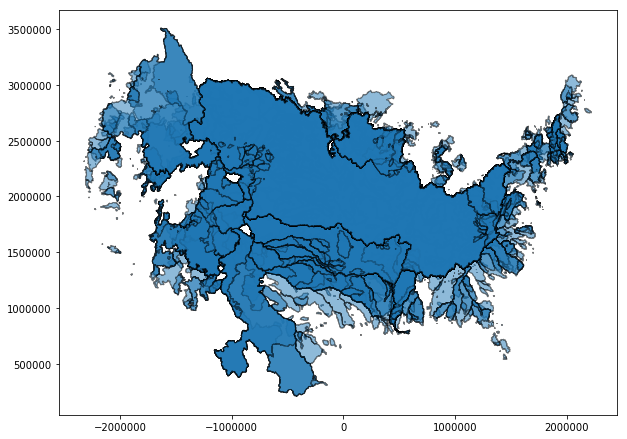

In [16]:
%matplotlib inline
wshds.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

Let's stop and look at what shapely is all about...

- Shapely is it's own Python package
- Uses functions from GEOS (port of the Java Topology Suite (JTS))
- GEOS is the geometry engine for PostGIS
- Shapely allows PostGIS geometry operations outside a RDBMS
- Shapely adheres to Open Geospatial Consortium Simple Features specs
- Nicely Pythonic approaches to geometric operations on spatial data


In [13]:
wshds.geometry.head()

0    POLYGON ((-1316129.5329 1915154.6479, -1315872...
1    (POLYGON ((269835.0009999983 2106464.9981, 269...
2    (POLYGON ((282944.9979000017 2238735.0019, 282...
3    POLYGON ((180833.6728000008 2149168.9475, 1811...
4    POLYGON ((-748618.1258000005 2755201.9364, -74...
Name: geometry, dtype: object

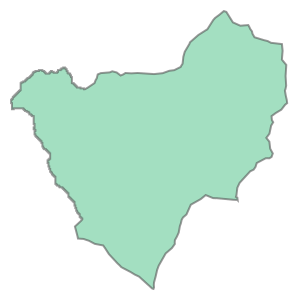

In [14]:
# Index the first watershed polygon by grabbing the first record in the geometry column
wshds.geometry[0]

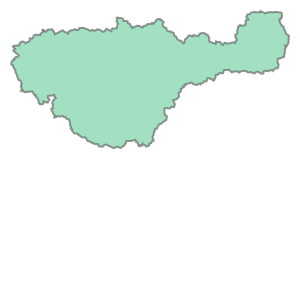

In [15]:
# Showing the second watershed polygon
wshds.geometry[1]

In [17]:
# Showing the NRSA Watershed ID of the first watershed record
wshds.SITE_ID[0]

'FW08RUT99066'

- That's how we index records and geometry in a GeoPandas GeoDataFrame
- We can drill into individual polygons to see how data is stored within the GeoSeries in GeoPandas
- This is nice thing with GeoPandas and Shapely - underlying geometry is all exposed for you to manipulate alongside attributes in a dataframe

In [19]:
from shapely.geometry import mapping
coords = mapping(wshds.geometry[0])
coords.keys()

dict_keys(['type', 'coordinates'])

In [20]:
coords

{'type': 'Polygon',
 'coordinates': (((-1316129.5329, 1915154.6479000002),
   (-1315872.4228000008, 1915040.6273999996),
   (-1315598.7892000005, 1915062.5436000004),
   (-1315558.8281999994, 1914991.172700001),
   (-1315531.171599999, 1914928.8285000008),
   (-1315468.8246999998, 1914841.1730000004),
   (-1315455.0024999995, 1914764.9989999998),
   (-1315381.7599, 1914640.428200001),
   (-1315050.5874000005, 1914539.4145),
   (-1314929.4131000005, 1914510.5840000007),
   (-1314814.8028999995, 1914449.8815000001),
   (-1314435.0009000003, 1914404.9968999997),
   (-1314412.1451999992, 1914172.6201000009),
   (-1314436.6385999992, 1913867.5745),
   (-1314284.9996000007, 1913685.0008000005),
   (-1314309.1395999994, 1913298.0484999996),
   (-1314289.3380999994, 1912965.3496000003),
   (-1314314.9991999995, 1912845.0033999998),
   (-1314332.8126999997, 1912799.7678999994),
   (-1314301.8731999993, 1912618.1268000007),
   (-1314268.1252999995, 1912471.8761999998),
   (-1314254.9971999992, 1

## Filtering, Spatial Joining, and Grouping
- Bring in a US states GeoDataFrame
- See how we filter records and columns using pandas syntax
- perform a spatial join of states and watersheds
- summarize joined data

In [2]:
url = "http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json"
states = gpd.read_file(url)

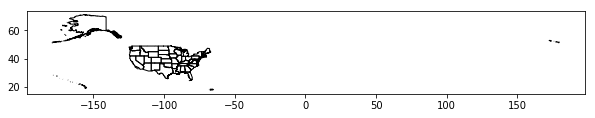

In [25]:
# Display
states.plot(figsize=(10,10), color='none', edgecolor='black')

In [28]:
# But first we'll subset...we just want CONUS states
# What are the GeoDataFrame Columns?
states.head() # or list(states) to just list column names

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"(POLYGON ((-67.619761 44.519754, -67.61541 44...."
1,0400000US25,25,Massachusetts,,7800.058,"(POLYGON ((-70.832044 41.606504, -70.823735 41..."
2,0400000US26,26,Michigan,,56538.901,"(POLYGON ((-88.684434 48.115785, -88.675628 48..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.057698 44.997431, -104.250145 4..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.0506 37.000396, -114.049995 36...."


In [36]:
# We can list all unique states in the GeoDataFrame like so:
states.NAME.unique()

array(['Maine', 'Massachusetts', 'Michigan', 'Montana', 'Nevada',
       'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania',
       'Rhode Island', 'Tennessee', 'Texas', 'Utah', 'Washington',
       'Wisconsin', 'Puerto Rico', 'Maryland', 'Alabama', 'Alaska',
       'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska',
       'New Hampshire', 'New Mexico', 'North Dakota', 'Oklahoma',
       'Oregon', 'South Carolina', 'South Dakota', 'Vermont', 'Virginia',
       'West Virginia', 'Wyoming'], dtype=object)

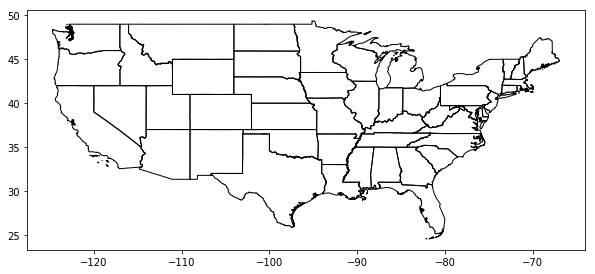

In [4]:
# Drop the non-CONUS states - standard pandas indexing syntax
states_to_drop = ['Alaska','Hawaii','Puerto Rico']
states = states[~states['NAME'].isin(states_to_drop)]
# Display again to verify fix
states.plot(figsize=(10,10), color='none', edgecolor='black')

### We were talking about spatial joins - back to it
- Now we have CONUS states, we can perform a spatial join with our watersheds
- We can ask and answer question 'How many watersheds in each state' with a couple GeoPandas lines
- REMEMBER, with GeoPandas, no 'projection on the fly' - GeoDataFrames MUST BE in same CRS

In [40]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
wshds.crs
states.crs

{'init': 'epsg:5070'}

{'init': 'epsg:4326'}

In [41]:
states = states.to_crs(wshds.crs)

In [46]:
# drop some columns prior to joining
# first we can remind ourselves of columns in each GeoDataFrame
list(states)
list(wshds)
states = states.drop(['GEO_ID','STATE','LSAD','CENSUSAREA'], axis=1) # Explicitly drop
wshds = wshds[['SITE_ID','Area_SqKM','geometry']] # Only keep these columns

['NAME', 'geometry']

['SITE_ID', 'Area_SqKM', 'geometry']

In [47]:
states_and_wshds = gpd.sjoin(states, wshds, how="inner", op='intersects')
states_and_wshds.head()

,NAME,geometry,index_right,SITE_ID,Area_SqKM
0,Maine,(POLYGON ((2217412.908716206 2725831.950220442...,732,FW08ME003,63.535908
0,Maine,(POLYGON ((2217412.908716206 2725831.950220442...,745,FW08ME019,4361.365228
41,New Hampshire,(POLYGON ((1896995.958605443 2428352.100176598...,745,FW08ME019,4361.365228
0,Maine,(POLYGON ((2217412.908716206 2725831.950220442...,1166,FW08NH009,8096.595373
41,New Hampshire,(POLYGON ((1896995.958605443 2428352.100176598...,1166,FW08NH009,8096.595373


- We've spatially joined watersheds to states where they intersect
- Our question we started with was 'how many watersheds are there in each state?'
- Now that we've joined data, we can make use of pandas group-by functionality
- Rememeber, EVERYTHING WE'VE DONE SO FAR IS IN MEMORY - no temporary files we need to write out

In [53]:
pd.options.display.float_format = '{:.2f}'.format # Otherwise we get results in scientific notation by default
states_and_wshds.groupby(['NAME']).count().head()
states_and_wshds.groupby(['NAME'])['Area_SqKM'].sum().head()

,geometry,index_right,SITE_ID,Area_SqKM
NAME,,,,
Alabama,118,118,118,118
Arizona,48,48,48,48
Arkansas,141,141,141,141
California,53,53,53,53
Colorado,222,222,222,222


NAME
Alabama      161191461.78
Arizona        5533744.65
Arkansas     141624121.72
California     1956722.94
Colorado     184956031.75
Name: Area_SqKM, dtype: float64

In [54]:
# What state has the most watershed area?
grouped = states_and_wshds.groupby(['NAME'])['Area_SqKM'].sum().reset_index()
grouped.sort_values('Area_SqKM', ascending=False).head()

,NAME,Area_SqKM
48,Wyoming,186682083.99
4,Colorado,184956031.75
32,North Dakota,181118884.53
24,Montana,180322499.57
39,South Dakota,180055996.60


- Going back to plotting, it's easy to add backgrounds as well with other libraries
- We'll need to convert to web mercator to use background tiles
- We'll pick a specific watershed to look at with background tiles

In [18]:
import contextily as ctx
import matplotlib.pyplot as plt
wshds = wshds.to_crs(epsg=3857)
#Alsea = wshds.loc[wshds['SITE_ID']=='FW08OR019']
#Alsea.plot()
#Alsea = Alsea.to_crs(epsg=4326)
#ax = Alsea.plot(figsize=(10,10), alpha=0.5, edgecolor='g')
#ctx.add_basemap(ax, zoom=12)
#plt.show()

RuntimeError: b'no arguments in initialization list'

In [13]:
wshds.head()

,SITE_ID,SITE_ID2,DATA_1,DATA_2,NOTES,Shape_Leng,Shape_Area,cbnfMN,cbnfMIN,cbnfMAX,cbnfSTD,cbnfCNT,cbnfSUM,cbnfMED,cbnfQLOW,cbnfQUPP,Area_SqKM,geometry
0,FW08RUT99066,5302463,MANTI_CANYON,NRSAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,36096.982930,4.665932e+07,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,46.659316,"POLYGON ((-1316129.5329 1915154.6479, -1315872..."
1,FW0805451900,17541945,RICHLAND_CREEK/RICHARD_CREEK,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,77948.288346,1.421056e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,142.105633,"(POLYGON ((269835.0009999983 2106464.9981, 269..."
2,FW0805458000,7016407,LITTLE_CEDAR_RIVER,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,220925.736120,7.723956e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,772.395602,"(POLYGON ((282944.9979000017 2238735.0019, 282..."
3,FW0805470500,6978994,SQUAW_CREEK,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,150840.978288,5.385289e+08,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,538.528947,"POLYGON ((180833.6728000008 2149168.9475, 1811..."
4,FW0806177500,12526443,REDWATER_RIVER,NAWQAHAND,SITE_ID=SiteID;SITE_ID2=LR_COMID;DATA_1=LR_GNI...,204217.393604,1.425196e+09,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1425.196129,"POLYGON ((-748618.1258000005 2755201.9364, -74..."


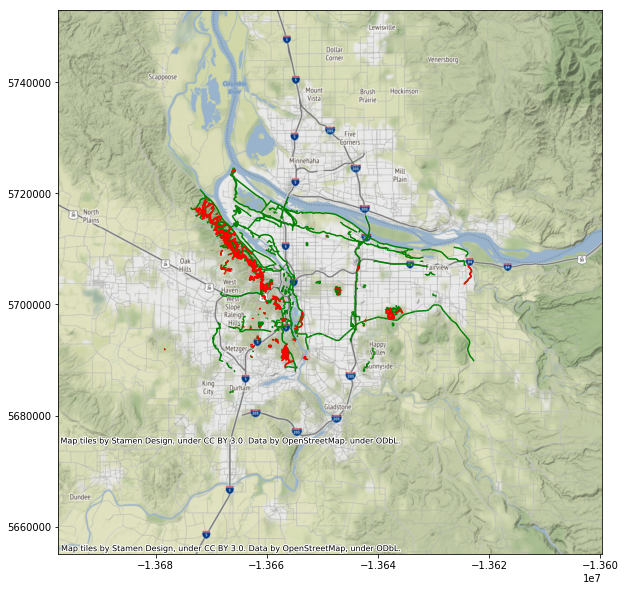

In [63]:
fig,ax = plt.subplots(figsize=(10,10))
ctx.add_basemap(trails.plot(ax=ax, color = 'green'), zoom=11)
ctx.add_basemap(dirt_trails.plot(ax=ax, color = 'red'), zoom=11)
plt.show()

### Grouping
- The power of Pandas with spatial data

In [58]:
trails.groupby(['Manager'])['MILES'].sum()

Manager
                                   0.124575
                                 122.199520
BES                                1.725596
Gresham                            7.609191
MCDD                               0.181731
Metro                              1.203559
North Clackamas Parks and Rec      0.235665
ODOT                              24.412219
OPRD                              13.666983
PBOT                               0.544896
PDOT                               4.743482
PDOT (adjacent landowners?)        2.420118
PP&R                              46.326938
PP&R - CN                        149.882184
Port of Portland                   2.022673
Portland Audubon                   1.651270
THPRD                              7.623373
Water bureau                       0.414734
existing owner                     1.307943
Name: MILES, dtype: float64

Coordinate reference systems are crucial using GeoPandas!

In [111]:
grouped = neighborhoods_and_trails.groupby(['NAME'])['MILES'].sum().reset_index()
grouped.sort_values('MILES', ascending=False).head()

,NAME,MILES
17,FOREST PARK,76.749665
29,LINNTON,64.055723
2,ARLINGTON HEIGHTS,17.257251
49,PLEASANT VALLEY,15.134122
58,ST. JOHNS,14.830995


## Rasterio
- Uses GDAL's data model but with Pythonic features and idioms
- Registers all known GDAL drivers for reading raster formats

### Import Rasterio and explore
- We'll read PRISM raster downloaded and stored on disk 
- Explore raster properties using PRISM and see how to combine with vector data for zonal statistics

In [2]:
import rasterio as rio
import os
import numpy as np

prism_april_30yrnorm = 'PRISM_tmean_30yr_normal_4kmM2_04_bil/PRISM_tmean_30yr_normal_4kmM2_04_bil.bil'
# Open file
raster = rio.open(prism_april_30yrnorm)

Explore the structure of raster as read in by Rasterio

In [4]:
# Check type of the variable 'raster'
type(raster)

rasterio.io.DatasetReader

- The raster variable is a 'DatasetReader' type
- This means we've opened the file for reading
- Several methods for extracting infomration about the raster

In [7]:
# Projection
raster.crs

CRS.from_dict(init='epsg:4269')

In [8]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
raster.transform

Affine(0.041666666667, 0.0, -125.0208333333335,
       0.0, -0.041666666667, 49.9375000000025)

In [19]:
# Dimensions
print('raster is ' + str(raster.width) + ' cells wide and is ' + str(raster.height) + ' cells tall')

raster is 1405 cells wide and is 621 cells tall


In [20]:
# All Metadata 
raster.meta

{'driver': 'EHdr',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 1405,
 'height': 621,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:4269'),
 'transform': Affine(0.041666666667, 0.0, -125.0208333333335,
        0.0, -0.041666666667, 49.9375000000025)}

In [9]:
# Read in all bands (this raster only has one) into numpy array
array =raster.read(1, masked=True) # we use the NoData value of -9999.0 as a mask on read-in
# Check type of the variable 'array'
print(type(array))
array

<class 'numpy.ma.core.MaskedArray'>


masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

In [11]:
# Quick stats - note I'm getting statistics from array and converting C to F
print('mean 30 year norm temp for April is ' + str(round((array.mean() * 9/5) + 32)))
print('min 30 year norm temp for April is ' + str(round((array.min() * 9/5) + 32)))
print('max 30 year norm temp for April is ' + str(round((array.max() * 9/5) + 32)))
print('median 30 year norm temp for April is ' + str(round((np.median(array) * 9/5) + 32)))

mean 30 year norm temp for April is 51.0
min 30 year norm temp for April is 17.0
max 30 year norm temp for April is 77.0
median 30 year norm temp for April is 40.0


Text(0.5, 1.0, 'PRISM 30-Year Normal April Temp (C)')

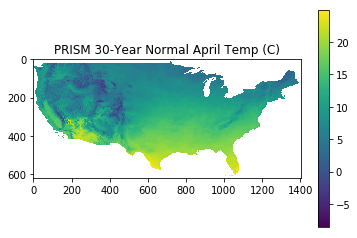

In [20]:
# Quick visualizing of the PRISM data
plt.imshow(array)
plt.colorbar()
plt.title('PRISM 30-Year Normal April Temp (C)')

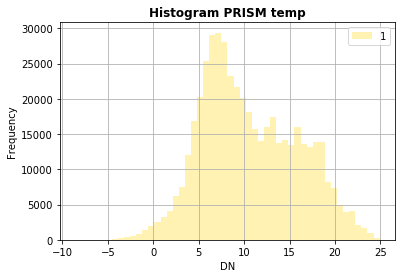

In [22]:
# Histogram
from rasterio.plot import show_hist

show_hist(array, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram PRISM temp")

### Clipping and Zonal Statistics
- Bring in GeoDataFrame of some watersheds
- Clip CONUS raster to GeoDataFrame
- Calculate zonal statistics for watersheds

In [6]:
# raster and GeoDataFrame must be same CRS:
print(wshds.crs)
print(raster.crs)
wshds = wshds.to_crs({'init': 'epsg:4269'})

{'init': 'epsg:5070'}
+init=epsg:4269


In [31]:
from rasterstats import zonal_stats
# Calculate zonal statistics of PRISM data for NRSA watersheds
# we're using raster.transform we showed earlier for our PRISM raster
zs_wshds = zonal_stats(wshds, array, affine=raster.transform, nodata=-9999.0,stats=['min', 'max', 'mean', 'median'],geojson_out=True)

In [17]:
print(type(zs_wshds)), print(len(zs_wshds))
print(type(zs_wshds[0]))

<class 'list'>
2172
<class 'dict'>


In [32]:
# zonal state geojson output back to GeoDataFrame
zs_wshds = gpd.GeoDataFrame.from_features(zs_wshds)
list(zs_wshds)

['Area_SqKM',
 'DATA_1',
 'DATA_2',
 'NOTES',
 'SITE_ID',
 'SITE_ID2',
 'Shape_Area',
 'Shape_Leng',
 'cbnfCNT',
 'cbnfMAX',
 'cbnfMED',
 'cbnfMIN',
 'cbnfMN',
 'cbnfQLOW',
 'cbnfQUPP',
 'cbnfSTD',
 'cbnfSUM',
 'geometry',
 'max',
 'mean',
 'median',
 'min']

Broadcast a function in Pandas to convert our mean temp C column to F and display our results

In [48]:
def temp_convert(x):
    return (x * 9/5) + 32
# zs_wshds[:= (zs_wshds['max'][max][median][min] * 9/5) + 32
#zs_wshds[['max']][['mean']][['median']][['min']].apply(temp_convert)
x = 5
zs_wshds[['max','mean','median','min']] = zs_wshds[['max','mean','median','min']].apply(temp_convert)

In [49]:
zs_wshds.iloc[0:10, [4,18,19,20,21]] 

,SITE_ID,max,mean,median,min
0,FW08RUT99066,34.691000,32.855000,32.855000,31.019000
1,FW0805451900,49.325000,49.057000,49.045999,48.838999
2,FW0805458000,47.516000,46.410980,46.426999,45.122000
3,FW0805470500,49.351999,49.123727,49.189999,48.650000
4,FW0806177500,44.420000,43.658340,43.781000,41.936000
5,FW0806183450,42.836000,42.378742,42.449001,41.621000
6,FW0806244500,42.692000,39.647677,40.433000,31.946000
7,FW0806309200,34.646000,33.626000,33.476000,32.675000
8,FW0806444000,45.860001,43.911500,43.785500,42.521000
9,FW0806447500,45.878000,45.275367,45.248000,44.492000


## Resources
- [GeoPandas Docs](http://geopandas.org/index.html)
- [Joris Van den Bossche geopandas-tutorial](https://github.com/jorisvandenbossche/geopandas-tutorial/blob/master/01-introduction-geospatial-data.ipynb)
- [Intro to Python GIS](https://automating-gis-processes.github.io/CSC/index.html)
- [The Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#)
- [GeoPandas Introduction](https://geohackweek.github.io/vector/04-geopandas-intro/)
- [Rasterio Docs](https://rasterio.readthedocs.io/en/stable/)
- [Raster processing using Python Tools](https://geohackweek.github.io/raster/)
- [Chris Albion website](https://chrisalbon.com/#python)
    - General Pyrhon / Data Science but incredibly useful!
- [GeoPandas Advanced Topics](https://geohackweek.github.io/vector/06-geopandas-advanced/)
- [Crop Raster With Shapefile in Python (UC EarthLab)](https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/crop-raster-data-with-shapefile-in-python/)
- [Mapping in Python with GeoPandas](http://darribas.org/gds15/content/labs/lab_03.html)



In [9]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']